In [1]:
import json
import pandas as pd

## Merge data

In [2]:
def read_large_json_line_by_line(file_path, max_lines=10000):
  data = []  # List to store the loaded JSON objects
  with open(file_path, 'r') as file:
      for i, line in enumerate(file):
          if i >= max_lines:  # Stop reading after max_lines
              break
          try:
            json_object = json.loads(line.strip())
            data.append(json_object)
          except json.JSONDecodeError as e:
            print(f"Invalid JSON: {e}")

          # print(line.strip())  # Process each line (e.g., print or save)
  # Convert the list of JSON objects to a DataFrame
  if data:
      df = pd.DataFrame(data)
      return df
  else:
      return None



In [3]:
file_path = "Yelp-JSON/yelp_dataset/yelp_academic_dataset_user.json"
df_user = read_large_json_line_by_line(file_path)

In [4]:
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [5]:
df_user = df_user.drop(['compliment_more', 'compliment_profile', 'compliment_cute','compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos', 'compliment_hot']  , axis=1)

In [6]:
from chardet import detect  # Requires pip install chardet

def read_large_json_line_by_line(file_path, max_lines=10000):
    data = []
    
    # 1. Detect file encoding first
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Sample first 10k bytes
        encoding = detect(raw_data)['encoding']
    
    # 2. Read with detected encoding + error handling
    try:
        with open(file_path, 'r', encoding=encoding, errors='replace') as file:
            for i, line in enumerate(file):
                if i >= max_lines:
                    break
                try:
                    json_object = json.loads(line.strip())
                    data.append(json_object)
                except json.JSONDecodeError as e:
                    print(f"JSON error line {i+1}: {e}")
    except UnicodeDecodeError:
        # Fallback to UTF-8 if detection fails
        with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
            for i, line in enumerate(file):
                if i >= max_lines:
                    break
                try:
                    json_object = json.loads(line.strip())
                    data.append(json_object)
                except json.JSONDecodeError as e:
                    print(f"JSON error line {i+1}: {e}")

    return pd.DataFrame(data) if data else None


In [7]:
file_path = "Yelp-JSON/yelp_dataset/yelp_academic_dataset_review.json"
df_review = read_large_json_line_by_line(file_path)

In [8]:
df_review = df_review.drop(['useful', 'text', 'funny', 'cool', 'date'], axis=1)

In [9]:
df_review.head()

,review_id,user_id,business_id,stars
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0


In [10]:
df = pd.merge(df_user, df_review, on='user_id', how = "inner")

In [11]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,review_id,business_id,stars
0,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,3.92,6fJnpF142fzitpY6_XOsDg,XleIcqVgh3iBeM4s-rdy6g,3.0
1,LbPkYMGmsu4snHkY-Ri1ww,David,14,2011-03-05 05:28:00,10,3,2,,"opIM6lGvGNIVL8tMDa3_Uw, 5wqafYyVJM5lKbOMIs-A3Q...",2,4.71,N-Qd7l6ijtpHNYy4wPeULw,bbEXAEFr4RYHLlZ-HFssTA,5.0
2,K7thO1n-vZ9PFYiC7nTR2w,Yelper,1554,2007-12-26 23:05:41,11276,6580,8918,"2008,2011,2012,2013,2014","dLOfp-2TAGAb78jGZPvMoA, HQF0jsricHg6n35DXjvh3w...",326,3.68,KTiNrz_M5Olh_RDXCneWUQ,NT5S6JV5wPwKOd3s3Yh1zQ,4.0
3,w-zD8Ln3XZszM82AfVrspg,Robin,90,2008-05-05 02:55:07,137,36,66,2010,"RgDVC3ZUBqpEe6Y1kPhIpw, -Yuf4Ph_6DzKwDOudoRc_A...",5,4.11,VMVaW0fZ1b9ZOdC5X2KNiQ,VbItL6RDULtnw4YvB6EhVg,1.0
4,xwLpDq-rYnyObtBZCD0Wgg,Ellie,191,2009-02-26 13:42:02,281,71,70,"2017,2018,2019,20,20,2021","y8aWXOimQ9ZgUgZ6q--nCQ, 4CC8PtCLBnp26KCVY0vuwA...",7,3.51,mpbicWK7S-Prgv5lhreVDw,Dv6RfXLYe1atjgz3Xf4GGw,4.0


In [12]:
file_path = "Yelp-JSON/yelp_dataset/yelp_academic_dataset_business.json"
df_restaurant = read_large_json_line_by_line(file_path)

In [13]:
df_restaurant.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [14]:
df_restaurant = df_restaurant.drop(['review_count', 'is_open'], axis=1)

In [15]:
df_restaurant.rename(columns={'stars': 'restaurant_stars', 'name': 'business_name'}, inplace=True)

Only keep the businesses that are restaurant or selling food

In [16]:
df_restaurant= df_restaurant[df_restaurant["categories"].str.contains("restaurant|food", case=False, na=False)]

In [17]:
df_restaurant

,business_id,business_name,address,city,state,postal_code,latitude,longitude,restaurant_stars,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4iTsgayXGV8zYppognuQXg,Jake's Wayback Burgers,369 W Lancaster Ave,Radnor,PA,19087,40.044662,-75.398588,3.0,"{'RestaurantsReservations': 'False', 'BikePark...","Food, Restaurants, Burgers","{'Monday': '10:30-20:0', 'Tuesday': '10:30-20:..."
9990,uz3bn1LnXUGPteDoHYhcRQ,KFC,5367 Ehrlich Rd,Tampa,FL,33625,28.083294,-82.542486,1.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chicken Shop, Restaurants, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
9993,vgZwA2X7X5oGcui9BDBgbw,Amish Country Market At The Feed Mill,7280 Nolensville Rd,Nolensville,TN,37135,35.953955,-86.670041,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bakeries, Farmers Market, Restaurants, Breakfa...","{'Monday': '10:0-17:0', 'Tuesday': '10:0-17:0'..."
9996,N-4ZOrM_qAnzBiCsJ7-ENA,Ricky's All Day Grill,140 Street Albert Road,St Albert,AB,T8N 7C8,53.620257,-113.611680,3.0,"{'RestaurantsAttire': 'u'casual'', 'BikeParkin...","Canadian (New), American (New), Restaurants",None


In [18]:
df = pd.merge(df, df_restaurant, on='business_id', how = "inner")

In [19]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,address,city,state,postal_code,latitude,longitude,restaurant_stars,attributes,categories,hours
0,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,938 Embarcadero Del Nrte,Goleta,CA,93117,34.412209,-119.855380,4.0,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Sandwiches, Restaurants, Burgers",None
1,LbPkYMGmsu4snHkY-Ri1ww,David,14,2011-03-05 05:28:00,10,3,2,,"opIM6lGvGNIVL8tMDa3_Uw, 5wqafYyVJM5lKbOMIs-A3Q...",2,...,5735 Hollister Ave,Goleta,CA,93117,34.435570,-119.824706,4.0,"{'Caters': 'False', 'GoodForKids': 'True', 'BY...","Fast Food, Burgers, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
2,qurv1eJZswxUZaZqN53Meg,Kristie,1156,2008-05-15 05:54:17,3121,1191,1892,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","z72G0C2kq0vP1vVX_EU2UQ, c0cxLfx6UfwHEnVik6FUBw...",100,...,5735 Hollister Ave,Goleta,CA,93117,34.435570,-119.824706,4.0,"{'Caters': 'False', 'GoodForKids': 'True', 'BY...","Fast Food, Burgers, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
3,w-zD8Ln3XZszM82AfVrspg,Robin,90,2008-05-05 02:55:07,137,36,66,2010,"RgDVC3ZUBqpEe6Y1kPhIpw, -Yuf4Ph_6DzKwDOudoRc_A...",5,...,300 South St,Philadelphia,PA,19147,39.941299,-75.147745,3.0,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Tex-Mex, Restaurants, American (Traditional), ...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
4,BmThnFPDalpbC1x98aXKaw,Heather L,233,2008-01-08 20:21:16,1386,509,780,"2008,2009,2010,2011","nARpe4-7lCkpY6-y_SywjA, 6WG2IGTVr-xKn0pYQZJGjw...",38,...,300 South St,Philadelphia,PA,19147,39.941299,-75.147745,3.0,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Tex-Mex, Restaurants, American (Traditional), ...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."


In [20]:
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'review_id',
       'business_id', 'stars', 'business_name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'restaurant_stars',
       'attributes', 'categories', 'hours'],
      dtype='object')

### The dataframe now has user, review and business combined 

## Use igraph to graph connections

In [21]:
from igraph import *
import matplotlib.pyplot as plt

In [22]:
user_name_pairs = dict(zip(df_user['user_id'], df_user['name']))

In [23]:
dict(list(user_name_pairs.items())[:5])

{'qVc8ODYU5SZjKXVBgXdI7w': 'Walker',
 'j14WgRoU_-2ZE1aw1dXrJg': 'Daniel',
 '2WnXYQFK0hXEoTxPtV2zvg': 'Steph',
 'SZDeASXq7o05mMNLshsdIA': 'Gwen',
 'hA5lMy-EnncsH4JoR-hFGQ': 'Karen'}

In [24]:
def get_name_safe(user_id):
    try:
        return user_name_pairs[user_id]
    except KeyError:
        return user_id

In [25]:
get_name_safe('qVc8ODYU5SZjKXVBgXdI7w')

'Walker'

In [26]:
def add_or_update_vertex(graph, user_id, **attributes):
    """Adds a vertex or updates attributes if it exists."""
    try:
        vertex = graph.vs.find(name=user_id)
        for key, value in attributes.items():
            vertex[key] = value
    except ValueError:
        graph.add_vertex(name=user_id, **attributes)

In [27]:
df_graph = df_user[:150]

In [28]:
# Initialize an empty graph
g = Graph(directed=False)

In [29]:
for index, row in df_graph.iterrows():
    # Add/update the user vertex with all attributes
    add_or_update_vertex(g, row["user_id"],
        label=row["name"],
        review_count=row["review_count"],
        yelping_since=row["yelping_since"],
        useful=row["useful"],
        # funny=row["funny"],
        # cool=row["cool"],
        fans=row["fans"],
        elite=row["elite"],
        average_stars=row["average_stars"],
        friends_num = len(row["friends"].split(','))
        # compliment_hot=row["compliment_hot"]
    )

    friends = row["friends"].split(',')
    friends = [s.strip() for s in friends]
    
    # Add friends and edges
    for friend_id in friends[:50]:
        # Add friend vertex (with minimal attributes if new)
        label = get_name_safe(friend_id)
        add_or_update_vertex(g, friend_id, label=label)
        
        # Add edge if not already present
        if not g.are_adjacent(row["user_id"], friend_id):
            g.add_edge(row["user_id"], friend_id)


In [30]:
for vertex in g.vs:
    if vertex["elite"]:
        num_elite = len(vertex["elite"].split(','))
        if num_elite > 5:
            vertex["color"] = "#6A0572" # dark purple
        else:
            vertex["color"] = "#F4A261" # medium orange
    else:
        vertex["color"] = "lightblue"

In [31]:
g.vs["degree"] = g.degree()
g.vs["is_center"] = [deg > 2 for deg in g.vs["degree"]]

Delete all leaf nodes to make the graph looks cleaner

In [32]:
leaf_nodes = [v.index for v in g.vs if g.vs["degree"][v.index] <= 1]  # Find leaf n

In [33]:
g.delete_vertices(leaf_nodes)

In [34]:
vertex_indices = list(g.vs.indices)
len(vertex_indices)

369

In [35]:
g.vs["label"] = [name if is_center else "" 
                for name, is_center in zip(g.vs["name"], g.vs["is_center"])]

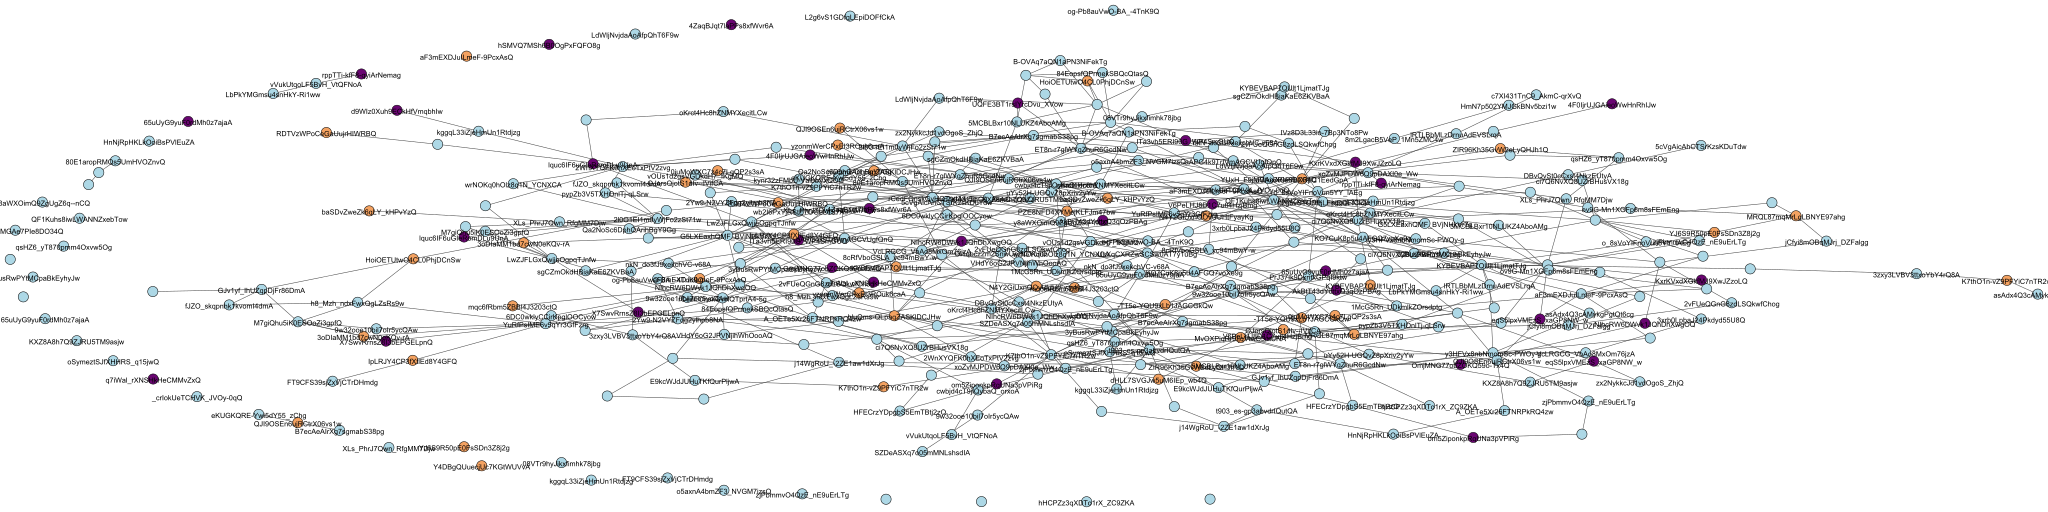

In [36]:
indices =  list(range(100,300))
subgraph = g.induced_subgraph(indices)
plot(g, 
     vertex_color=subgraph.vs["color"],
     # vertex_label=g.vs["label"],
     vertex_label=subgraph.vs["label"],
     bbox=(4000, 1000),
    )

## Build another graph that has restaurant in it

In [37]:
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'review_id',
       'business_id', 'stars', 'business_name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'restaurant_stars',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [38]:
df.shape

(458, 25)

In [39]:
g = Graph(directed=False)

# Define colors for edges based on rating
def edge_color_by_rating(stars):
    if stars is not None and stars > 3:
        return "green"
    else:
        return "red"

for index, row in df[:200].iterrows():
    # Add/update the user vertex with all attributes
    add_or_update_vertex(g, row["user_id"],
        label=row["name"],
        review_count=row["review_count"],
        yelping_since=row["yelping_since"],
        useful=row["useful"],
        fans=row["fans"],
        type="user",
        elite=row["elite"],
        funny = row['funny'],
        cool = row['cool'],
        average_stars=row["average_stars"],
    )

    
    add_or_update_vertex(g, row['business_id'],
        type="restaurant",
        rating = row["restaurant_stars"],
        isRes = True,
        label=row.get("restaurant_name", str(row["business_name"]))
    )
    
    # Add edge
    g.add_edge(row["user_id"], row["business_id"],
               review_id=row["review_id"],
               stars=row.get("stars", None),  # Optional if available
               color= edge_color_by_rating(row.get("stars", None))
    )

    friends = row["friends"].split(',')
    friends = [s.strip() for s in friends]
    
    # Add friends and edges
    for friend_id in friends[:50]:
        # Add friend vertex (with minimal attributes if new)
        label = get_name_safe(friend_id)
        add_or_update_vertex(g, friend_id, label=label)
        
        # Add edge if not already present
        if not g.are_adjacent(row["user_id"], friend_id):
            g.add_edge(row["user_id"], friend_id)


In [40]:
for vertex in g.vs:
    if vertex["isRes"]:
        vertex["shape"] = "square"
        vertex["color"] = "red"
        if vertex["rating"] > 3:
            vertex["color"] = "green"
        
    else:
        if vertex["elite"]:
            num_elite = len(vertex["elite"].split(','))
            if num_elite > 5:
                vertex["color"] = "#6A0572" # dark purple
            else:
                vertex["color"] = "#F4A261" # medium orange
        else:
            vertex["color"]= "lightblue" # light blue

In [41]:
max_valid_index = g.vcount() - 1  # In
max_valid_index

7625

In [42]:
indices =  list(range(1000,2000))
subgraph = g.induced_subgraph(indices)

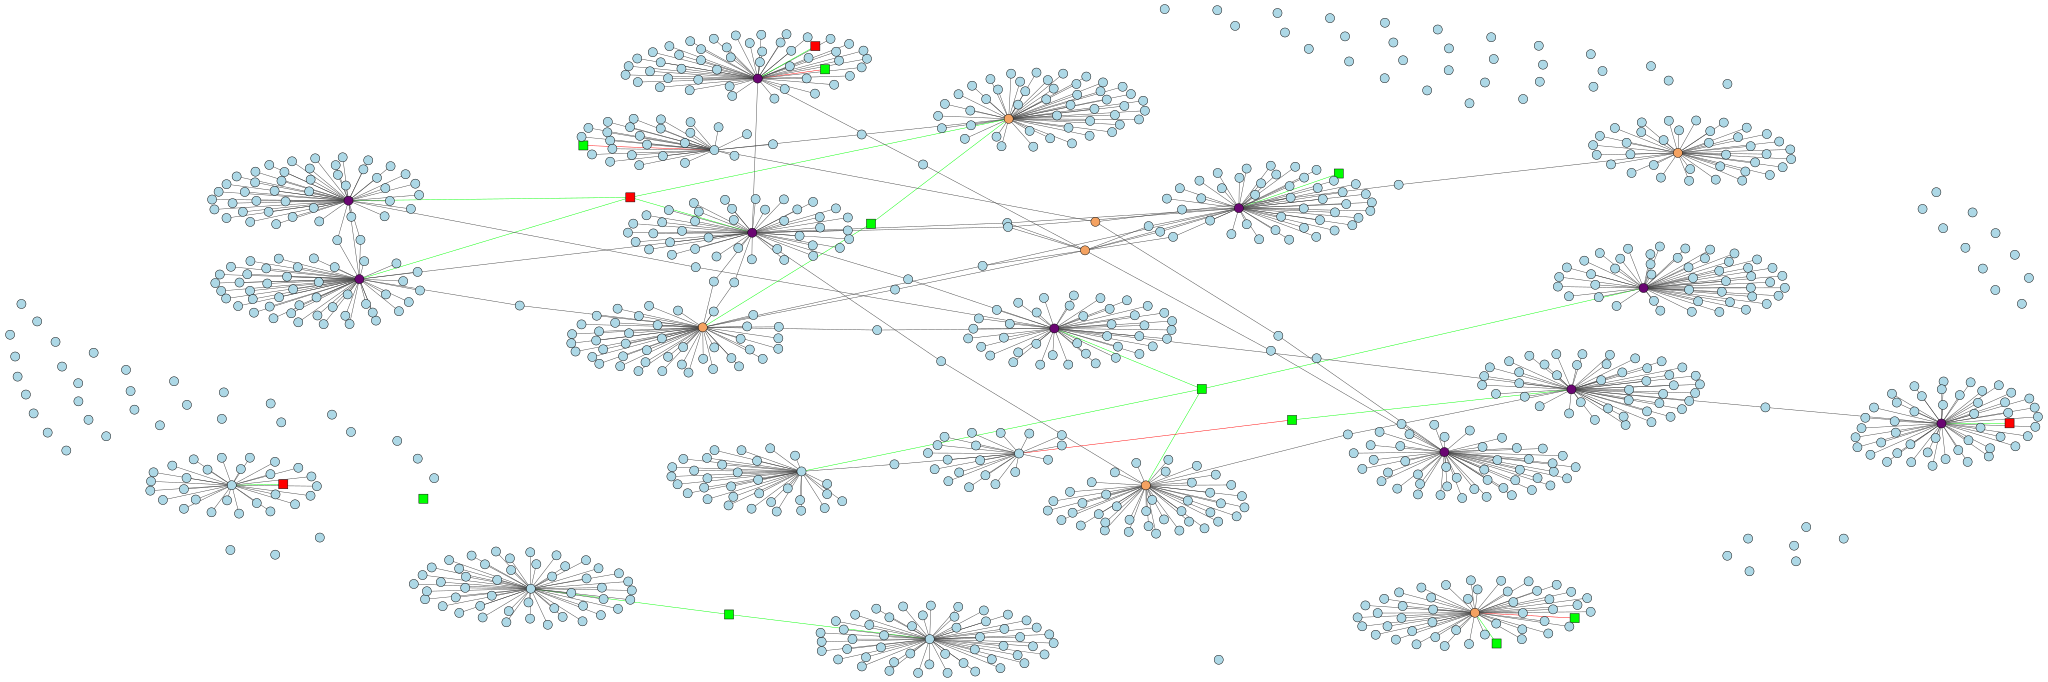

In [43]:
plot(subgraph, 
     vertex_color=subgraph.vs["color"],
     # vertex_label=g.vs["label"],
     vertex_label=None,
     bbox=(4500, 1500),
    )

In [44]:
def get_user_subgraph(user_id):
     # Suppose 'g' is your original igraph graph and 'user_id' is the user you want to focus on
    
    # Find the vertex index of the user by attribute 'label' or 'name' or 'user_id'
    user_vertex = g.vs.find(name=user_id)  # Adjust attribute if needed
    
    # Get the neighbors of this user vertex (vertices connected by edges)
    neighbors = g.neighbors(user_vertex.index)
    
    # Include the user vertex itself
    vertices_to_keep = [user_vertex.index] + neighbors
    
    # Create the induced subgraph with the user and their connected vertices
    subgraph = g.induced_subgraph(vertices_to_keep)
    
    # Now you can plot or analyze 'subgraph'
    return subgraph

In [45]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,address,city,state,postal_code,latitude,longitude,restaurant_stars,attributes,categories,hours
0,2l0O1EI1m0yWjFo2zSt71w,Shiho,2837,2005-07-02 01:59:55,19237,9542,15235,"2006,2007,2008,2009,2010,2011","ZxigNlfaGmqtC1CROVu9Dg, XKAFikZAfddYv0Vg1PUkwA...",492,...,938 Embarcadero Del Nrte,Goleta,CA,93117,34.412209,-119.855380,4.0,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Sandwiches, Restaurants, Burgers",None
1,LbPkYMGmsu4snHkY-Ri1ww,David,14,2011-03-05 05:28:00,10,3,2,,"opIM6lGvGNIVL8tMDa3_Uw, 5wqafYyVJM5lKbOMIs-A3Q...",2,...,5735 Hollister Ave,Goleta,CA,93117,34.435570,-119.824706,4.0,"{'Caters': 'False', 'GoodForKids': 'True', 'BY...","Fast Food, Burgers, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
2,qurv1eJZswxUZaZqN53Meg,Kristie,1156,2008-05-15 05:54:17,3121,1191,1892,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","z72G0C2kq0vP1vVX_EU2UQ, c0cxLfx6UfwHEnVik6FUBw...",100,...,5735 Hollister Ave,Goleta,CA,93117,34.435570,-119.824706,4.0,"{'Caters': 'False', 'GoodForKids': 'True', 'BY...","Fast Food, Burgers, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
3,w-zD8Ln3XZszM82AfVrspg,Robin,90,2008-05-05 02:55:07,137,36,66,2010,"RgDVC3ZUBqpEe6Y1kPhIpw, -Yuf4Ph_6DzKwDOudoRc_A...",5,...,300 South St,Philadelphia,PA,19147,39.941299,-75.147745,3.0,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Tex-Mex, Restaurants, American (Traditional), ...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
4,BmThnFPDalpbC1x98aXKaw,Heather L,233,2008-01-08 20:21:16,1386,509,780,"2008,2009,2010,2011","nARpe4-7lCkpY6-y_SywjA, 6WG2IGTVr-xKn0pYQZJGjw...",38,...,300 South St,Philadelphia,PA,19147,39.941299,-75.147745,3.0,"{'Corkage': 'False', 'RestaurantsGoodForGroups...","Tex-Mex, Restaurants, American (Traditional), ...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."


## Plot subgraph

In [46]:
subgraph = get_user_subgraph("BmThnFPDalpbC1x98aXKaw")

In [47]:
subgraph.vcount()

57

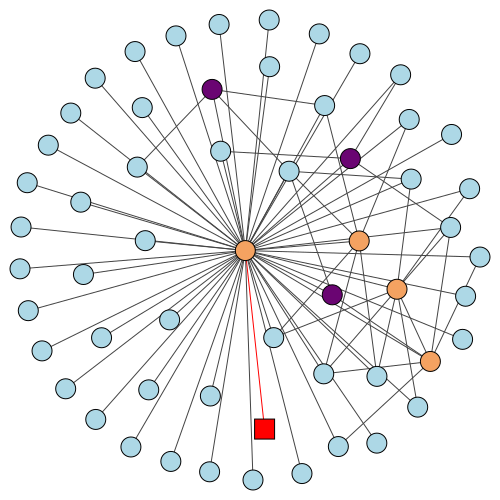

In [48]:
plot(subgraph, 
     vertex_color=subgraph.vs["color"],
     # vertex_label=g.vs["label"],
     vertex_label=None,
     bbox=(500, 500),
    )

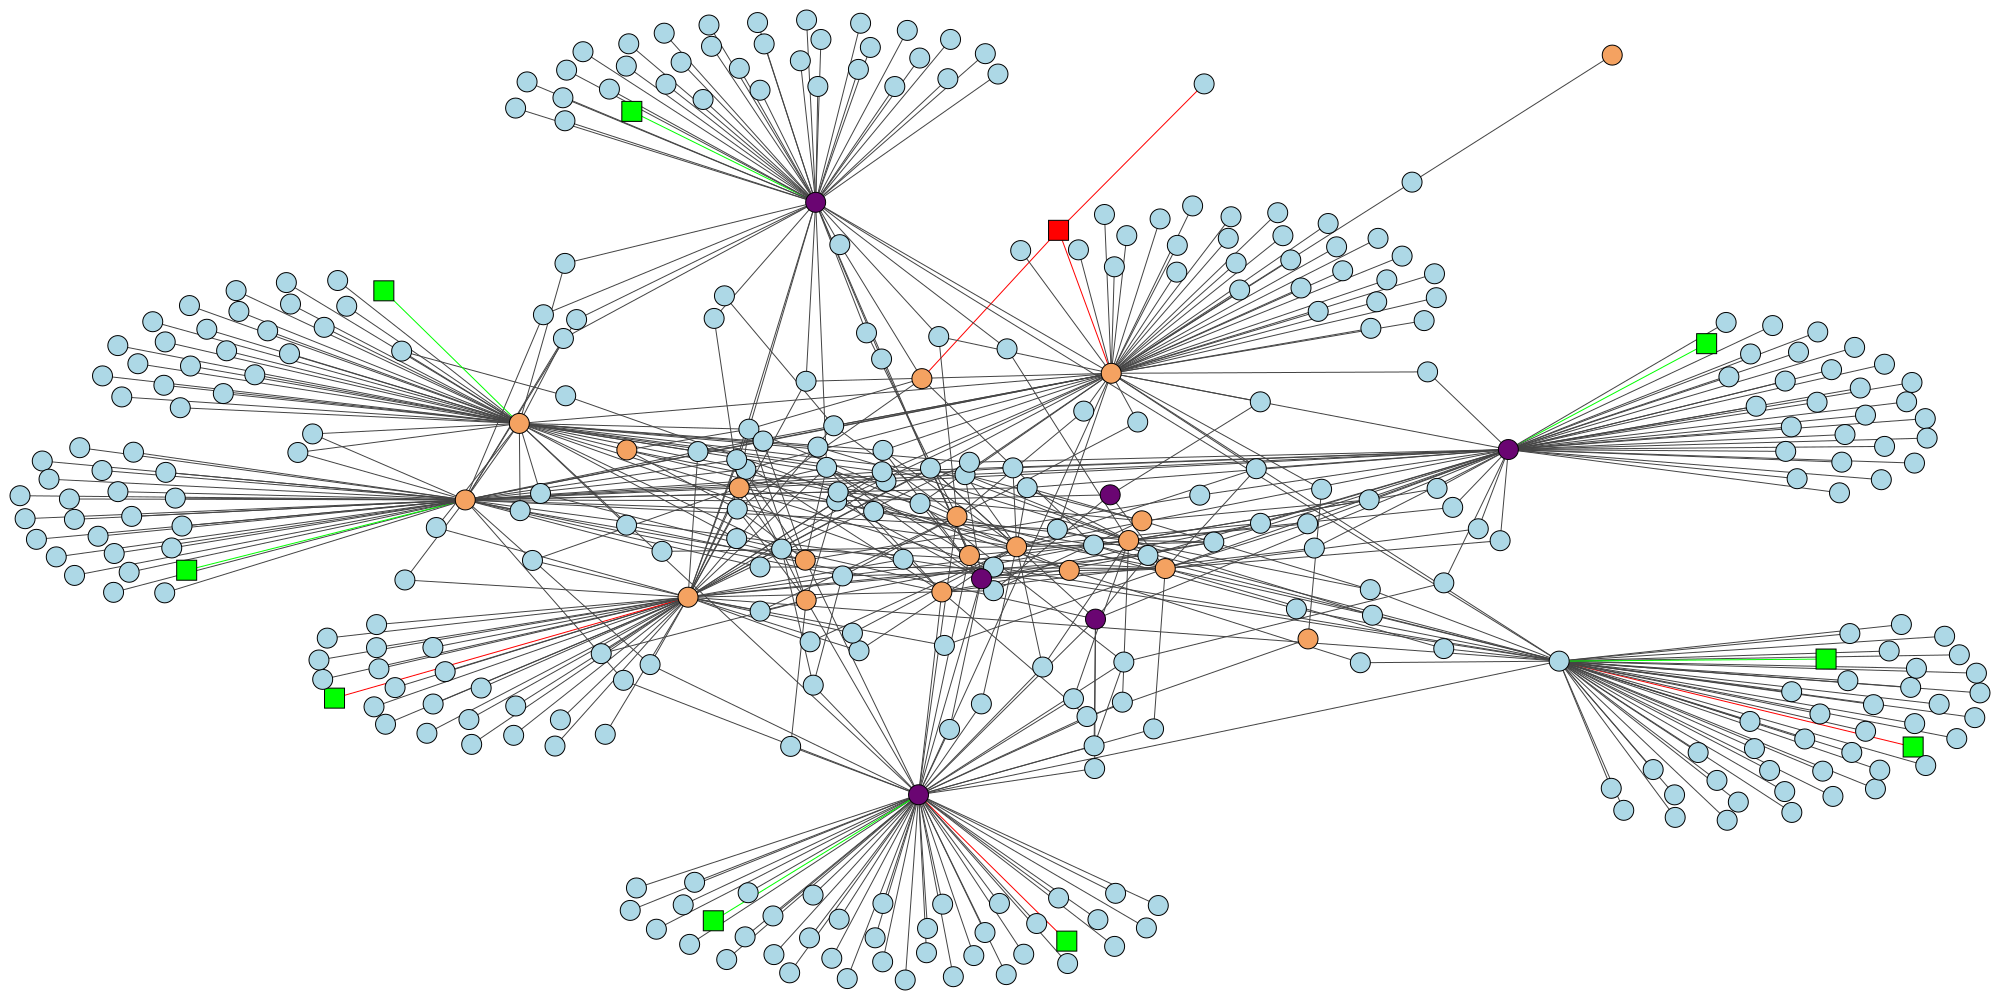

In [69]:
def get_friends_of_friends_subgraph(g, user_id):
    """Returns a subgraph containing:
    - Original user
    - Their direct friends
    - Friends of friends
    - All edges between these nodes
    """
    try:
        # Get all relevant vertices
        direct_friends = set(g.neighbors(user_id))
        fof = set()
        
        # Find friends-of-friends
        for friend in direct_friends:
            fof.update(g.neighbors(friend))
        
        # Combine all relevant nodes
        all_nodes = {user_id} | direct_friends | fof
        
        graph =  g.subgraph(list(all_nodes))
        return graph
        
    
    except Exception as e:
        print(f"Error processing {user_id}: {str(e)}")
        return None

# Usage
user_id = "BmThnFPDalpbC1x98aXKaw"
fof_graph = get_friends_of_friends_subgraph(g, user_id)
type(fof_graph)
# Optional: Visualize immediately
plot(fof_graph, 
     vertex_color=fof_graph.vs["color"],
     # vertex_label=g.vs["label"],
     vertex_label=None,
     bbox=(2000, 1000),
    )


## Recommendation algorithm

In [54]:
import igraph as igraph

In [70]:
'''
    This function is to rank user based on certain factors
    The most important is elite duration, then whether or not the user is elite
    Then the number of received useful, funny and cool
    Finally is the average stars that the user have
'''
# Get all restaurant ratings given by a specific user
def get_user_ratings(g, user_id):
    ratings = {}  # Dictionary to hold {restaurant_vertex_id: stars}
    
    # Iterate over all neighors connected to the user vertex
    for neighbor in g.neighbors(user_id):
        # Check if the neighbor vertex is a restaurant
        if g.vs[neighbor]["type"] == 'restaurant':
            # Get the edge ID connecting user and restaurant vertices
            eid = g.get_eid(user_id, neighbor)
            
            # Access the edge object using edge ID
            edge = g.es[eid]
            
            # Safely get the 'stars' rating attribute if it exists
            stars = edge["stars"] if "stars" in edge.attributes() else None
            
            # If a rating exists, add it to the ratings dictionary
            if stars is not None:
                ratings[neighbor] = stars
    
    # Return the dictionary of restaurant ratings by the user
    return ratings


def advanced_rank_users(graph, weights=(0.4, 0.3, 0.2, 0.1)):
    """Weighted user ranking for igraph with elite/engagement metrics"""
    results = []
    
    for user in graph.vs.select(type_eq="user"):
        # 1. Elite status analysis
        elite_duration = len(user["elite"].split(',')) if user["elite"] else 0
        
        # 2. Social engagement metrics
        engagement = sum(user[attr] for attr in ["useful", "funny", "cool"])
        
        # 3. Composite scoring
        score = (
            weights[0] * (2 if elite_duration > 5 else 
                        1 if elite_duration > 3 else 0) +
            weights[1] * min(elite_duration/10, 1) +
            weights[2] * (engagement/1000) +
            weights[3] * (user["average_stars"]/5)
        )
        
        # 4. Store results with igraph-compatible format
        results.append({
            "vertex_id": user.index,
            "user_id": user["name"],
            "score": score,
            "elite": elite_duration,
            "engagement": engagement,
            "avg_stars": user["average_stars"]
        })
    
    # Sort by descending score
    temp = sorted(results, key=lambda x: -x["score"]) 
    return [user['vertex_id'] for user in temp]


# Usage with igraph plotting
rankings = advanced_rank_users(g)


In [71]:
# Recommend restaurants for a given user_id based on elite users' ratings
'''
    Recommend restaurants for a given graph
    Get 15 highest rank users then find the best 5 rated restaurants among these users
'''
def recommend_restaurants(g):
    # super_super_users, super_users = find_super_users(g)

    # # Prioritize super super users
    # candidate_users = super_super_users if super_super_users else super_users
    # Prioritize super super users
    candidate_users = advanced_rank_users(g)
    # print(candidate_users)
    # print("---")

    # Aggregate ratings from candidate users
    restaurant_scores = {}
    for su in candidate_users[:15]:
        # Get restaurant, ratings from super super users (or super users)
        ratings = get_user_ratings(g, su)
        # Aggregate all the ratings
        for restaurant, stars in ratings.items():
            if restaurant not in restaurant_scores:
                restaurant_scores[restaurant] = []
            restaurant_scores[restaurant].append(stars)

    # print(restaurant_scores)
    # Compute average rating per restaurant
    avg_scores = {r: sum(scores)/len(scores) for r, scores in restaurant_scores.items()}

    # Sort by descending average rating
    sorted_restaurants = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)

    # Return top 5 recommendations (restaurant IDs and average ratings)
    # print(sorted_restaurants)

    recommended = sorted_restaurants[:5]
    first_elements = [t[0] for t in recommended]
    ids = g.vs[first_elements]["name"]
    
    return df_restaurant[df_restaurant['business_id'].isin(ids)]

To recommend restaurant based on user's friend's friends, passed on that particular user's friends of friends graph

In [73]:
recommend_restaurants(fof_graph)

,business_id,business_name,address,city,state,postal_code,latitude,longitude,restaurant_stars,attributes,categories,hours
5931,1UNorskttXSWuEcgzKzXcA,Xochitl,408 S 2nd St,Philadelphia,PA,19147,39.942874,-75.145645,3.5,"{'RestaurantsAttire': ''casual'', 'GoodForKids...","Lounges, Restaurants, Asian Fusion, Mexican, L...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-23:0', ..."
6153,DGvkU7CkdBs6lNbncQmF3A,Franklin's,3521 Bowman St,Philadelphia,PA,19129,40.011006,-75.189062,3.5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Burgers, Nightlife, Beer, Wine & ...","{'Tuesday': '14:0-0:0', 'Wednesday': '14:0-0:0..."
6691,kkcQYuF3w5iHnHMf0EnRhQ,Joe's Steaks + Soda Shop,6030 Torresdale Ave,Philadelphia,PA,19135,40.018513,-75.058137,4.5,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...","Sandwiches, Restaurants, Cheesesteaks","{'Wednesday': '10:30-19:0', 'Thursday': '10:30..."
7858,pe01uqQsa6raj-4HWRjgGg,Independence Brew Pub,1150 Filbert St,Philadelphia,PA,19107,39.952616,-75.159445,4.5,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Restaurants, Breweries, Bars, Nightlife",None
9336,9gObo5ltOMo6UgsaXaHPWA,R2L,"50 S 16th St, Fl 37",Philadelphia,PA,19102,39.951617,-75.167190,3.5,"{'RestaurantsAttire': 'u'dressy'', 'Restaurant...","American (New), Lounges, Nightlife, Cocktail B...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
